In [1]:
# This is to rain and test the YOLOv6 algorithm on Face Mask Wearing dataset.
# Note: this notebook was run using "Python 3 (ipykernel)" on Azure ML.

# He Zhang, July, 2022

In [1]:
import cv2
import matplotlib.pyplot as plt
%matplotlib inline

import torch
import torchvision
print("Torch:", torch.__version__)
print("Torchvision:", torchvision.__version__)
print("GPU:", torch.cuda.device_count(), torch.cuda.get_device_name(0)) if torch.cuda.is_available() else print("NO GPU")

Torch: 1.8.2+cu102
Torchvision: 0.9.2+cu102
GPU: 4 Tesla M60


In [2]:
# go to folder YOLOv6
%cd YOLOv6/

/mnt/batch/tasks/shared/LS_root/mounts/clusters/multi-gpu-4-tesla-m60/code/Users/zhanghe/cv-safety-detection/YOLOv6


In [9]:
%%writefile ./data/mask149yolov6.yaml

# train & val & test sets
train: ../datasets/mask_wearing_dataset/images/train  # train images (relative to 'path') 128 images
val: ../datasets/mask_wearing_dataset/images/valid  # val images (relative to 'path') 29 images
test:  # test images (optional)

# whether it is coco dataset, only coco dataset should be set to True.
is_coco: False

# classe information
nc: 2 # number of classes
names: ["mask", "no-mask"] # class names


Overwriting ./data/mask149yolov6.yaml


In [12]:
# train
%run -i tools/train.py --batch 20 --img-size 672 --epochs 100 --name exp_mask --data data/mask149yolov6.yaml --conf configs/yolov6s_finetune.py --eval-interval 10 --device 0

Using 1 GPU for training... 
training args are: Namespace(batch_size=20, check_images=False, check_labels=False, conf_file='configs/yolov6s_finetune.py', data_path='data/mask149yolov6.yaml', device='0', dist_url='env://', epochs=100, eval_final_only=False, eval_interval=10, gpu_count=0, heavy_eval_range=50, img_size=672, local_rank=-1, name='exp_mask', output_dir='./runs/train', rank=-1, resume=False, save_dir='runs/train/exp_mask', workers=8, world_size=1)

Train: Final numbers of valid images: 105/ labels: 105. 
0.1s for dataset initialization.
Convert to COCO format
100%|██████████| 29/29 [00:00<00:00, 25645.12it/s]
Convert to COCO format finished. Resutls saved in ../datasets/mask_wearing_dataset/annotations/instances_valid.json
Val: Final numbers of valid images: 29/ labels: 29. 
0.3s for dataset initialization.
Loading state_dict from ./weights/yolov6s.pt for fine-tuning...
Model: Model(
  (backbone): EfficientRep(
    (stem): RepVGGBlock(
      (nonlinearity): ReLU(inplace=True)


Training start...

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
      0/99     2.137     1.512     6.777      2.37: 100%|██████████| 6/6 [00:14<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.03s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.09s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 0 | mAP@0.5: 0.008861640231149591 | mAP@0.50:0.95: 0.0024993974050634754


DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.009
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.001
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.002
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.003
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.003
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.006
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.048
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.090
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.045
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.103
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
      1/99     2.084     1.427     6.653      2.24: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
      2/99     1.959     1.321     5.675     1.974: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
      3/99     2.005     1.341      5.39     1.806: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
      4/99     1.905     1.389     4.639     1.666: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
      5/99     1.749     1.257     4.256     1.478: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
      6/99      1.68     1.063     3.798     1.325: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
      7/99     1.636     1.148      3.82     1.381: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
      8/99     1.

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 10 | mAP@0.5: 0.18307742273318833 | mAP@0.50:0.95: 0.08423551257569445


DONE (t=0.28s).
Accumulating evaluation results...
DONE (t=0.06s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.183
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.056
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.021
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.120
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.063
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.288
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.569
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.553
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     11/99      1.53    0.9673     2.866     1.251: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     12/99     1.575    0.9869     2.952     1.226: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     13/99     1.451     0.926     2.739     1.107: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     14/99     1.483    0.9785     2.716      1.12: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     15/99     1.517    0.9579     2.571     1.084: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     16/99     1.365     0.947     2.519     1.074: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     17/99     1.334     0.903     2.362     1.035: 100%|██████████| 6/6 [00:05<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     18/99     1.

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 20 | mAP@0.5: 0.4023855199374751 | mAP@0.50:0.95: 0.2355183026739019


DONE (t=0.25s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.236
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.402
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.246
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.040
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.186
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.292
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.142
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.491
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.586
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.573
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     21/99     1.389    0.9067     2.318     1.026: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     22/99     1.331    0.7889     1.969    0.9703: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     23/99     1.275     0.764     1.871    0.9564: 100%|██████████| 6/6 [00:03<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     24/99     1.433    0.8376     2.063    0.9751: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     25/99     1.346    0.8133     1.983    0.9458: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     26/99      1.33    0.7768     1.839    0.9215: 100%|██████████| 6/6 [00:05<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     27/99     1.256    0.7288     1.737    0.9675: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     28/99     1.

loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 30 | mAP@0.5: 0.4169891267198841 | mAP@0.50:0.95: 0.2308741094165825


DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.231
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.417
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.221
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.079
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.257
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.108
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.449
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.525
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.585
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     31/99     1.375    0.8826     2.073    0.9633: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     32/99     1.345    0.7819     1.818    0.9366: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     33/99     1.346    0.7924      1.78    0.8785: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     34/99     1.255    0.7574     1.752     0.845: 100%|██████████| 6/6 [00:06<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     35/99     1.154    0.7145     1.672    0.8892: 100%|██████████| 6/6 [00:03<
     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     36/99      1.34    0.7348     1.678    0.8914: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     37/99     1.246    0.7013     1.618    0.8372: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     38/99     1.2

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 40 | mAP@0.5: 0.4963854895803864 | mAP@0.50:0.95: 0.28417227686124147


DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.284
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.496
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.300
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.064
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.242
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.326
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.147
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.529
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.606
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.135
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.607
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     41/99     1.395    0.7825     1.689    0.8957: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     42/99     1.518    0.7947     1.672    0.9099: 100%|██████████| 6/6 [00:03<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     43/99     1.246    0.7402     1.625    0.8354: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     44/99     1.441    0.7806     1.684    0.8674: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     45/99     1.333    0.8086     1.761    0.8683: 100%|██████████| 6/6 [00:04<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     46/99     1.389    0.7797     1.686    0.8592: 100%|██████████| 6/6 [00:06<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     47/99     1.314    0.7281     1.632    0.8391: 100%|██████████| 6/6 [00:03<

     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     48/99      1

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 50 | mAP@0.5: 0.4636062062346255 | mAP@0.50:0.95: 0.280087265698599


DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.280
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.464
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.315
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.057
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.254
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.322
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.151
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.556
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.626
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.105
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.609
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     51/99     1.284    0.6961     1.569    0.8386: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.11s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 51 | mAP@0.5: 0.426052344596438 | mAP@0.50:0.95: 0.25050004483103216


DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.251
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.426
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.245
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.083
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.226
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.310
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.133
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.529
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.618
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.145
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.592
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     52/99      1.23    0.6923     1.511    0.8011: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.07s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 52 | mAP@0.5: 0.513701052218108 | mAP@0.50:0.95: 0.3197846028246503


DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.320
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.395
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.055
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.317
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.326
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.173
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.557
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.642
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.125
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.636
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     53/99     1.205    0.6827     1.584    0.8385: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.07s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 53 | mAP@0.5: 0.6117933958132507 | mAP@0.50:0.95: 0.3745430454864188


DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.375
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.612
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.373
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.087
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.375
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.365
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.191
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.565
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.631
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.601
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     54/99     1.233    0.6452     1.511    0.7967: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.07s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.11s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 54 | mAP@0.5: 0.579598211119237 | mAP@0.50:0.95: 0.38482007671578905


DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.385
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.580
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.456
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.398
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.371
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.214
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.170
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.643
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     55/99     1.261    0.6806     1.505    0.8061: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.09s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 55 | mAP@0.5: 0.5481493157324375 | mAP@0.50:0.95: 0.3225744760906182


DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.323
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.548
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.329
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.078
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.286
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.364
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.152
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.513
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.583
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.557
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     56/99     1.242    0.6561     1.528    0.7931: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.09s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 56 | mAP@0.5: 0.564473985983847 | mAP@0.50:0.95: 0.3460312067433621


DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.346
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.564
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.341
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.080
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.332
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.363
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.177
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.554
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.616
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.185
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.607
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     57/99      1.25    0.6868     1.588    0.7566: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.07s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.08s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 57 | mAP@0.5: 0.5662057809836962 | mAP@0.50:0.95: 0.3643483332729495


DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.364
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.566
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.440
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.379
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.373
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.174
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.565
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.632
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     58/99     1.187     0.695     1.544    0.7724: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.06s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 58 | mAP@0.5: 0.6214890640563456 | mAP@0.50:0.95: 0.3870120159077204


DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.387
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.621
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.387
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.088
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.398
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.383
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.203
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.553
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.617
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.631
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     59/99     1.217    0.7076     1.622    0.7983: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.06s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 59 | mAP@0.5: 0.5944903191382871 | mAP@0.50:0.95: 0.3843176392597907


DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.384
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.594
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.454
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.095
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.384
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.401
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.172
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.575
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.638
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.185
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.648
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     60/99     1.323    0.7309     1.532    0.7795: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.09s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.05s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 60 | mAP@0.5: 0.5687405728305651 | mAP@0.50:0.95: 0.3439140504177299


DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.344
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.569
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.376
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.303
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.412
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.159
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.515
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.586
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.560
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     61/99     1.273    0.6545     1.406    0.7818: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.10s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 61 | mAP@0.5: 0.525362139965742 | mAP@0.50:0.95: 0.3173742407454508


DONE (t=0.21s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.317
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.525
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.344
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.054
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.296
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.357
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.546
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.604
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.160
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.579
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     62/99     1.287    0.6634     1.461    0.7789: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.10s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 62 | mAP@0.5: 0.5623631260229057 | mAP@0.50:0.95: 0.32044910532854787


DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.320
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.562
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.322
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.081
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.285
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.386
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.169
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.514
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.581
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.539
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     63/99     1.235    0.6599     1.418    0.7809: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.07s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 63 | mAP@0.5: 0.6180279768758995 | mAP@0.50:0.95: 0.3908277580822071


DONE (t=0.20s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.391
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.618
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.454
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.076
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.405
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.379
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.190
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.574
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.638
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.190
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.630
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     64/99     1.239    0.6167     1.363    0.7613: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.07s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 64 | mAP@0.5: 0.6467358110578183 | mAP@0.50:0.95: 0.41065238247719454


DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.411
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.647
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.438
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.090
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.411
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.418
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.201
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.585
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.645
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.625
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     65/99     1.165    0.6421     1.383    0.7484: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.05s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 65 | mAP@0.5: 0.6571107690177374 | mAP@0.50:0.95: 0.42693844551326166


DONE (t=0.18s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.427
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.657
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.505
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.096
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.448
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.407
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.194
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.619
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.679
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     66/99     1.289    0.6856     1.418    0.7982: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.07s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 66 | mAP@0.5: 0.6529451931393053 | mAP@0.50:0.95: 0.4145695718794456


DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.415
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.653
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.437
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.089
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.434
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.401
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.161
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.587
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.650
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.260
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.629
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     67/99     1.246    0.7084      1.53    0.7629: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.05s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 67 | mAP@0.5: 0.6560457674357719 | mAP@0.50:0.95: 0.40278162481447444


DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.403
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.656
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.421
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.073
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.429
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.418
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.165
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.560
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.623
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.195
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.603
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     68/99     1.165    0.6339     1.274    0.7346: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.05s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 68 | mAP@0.5: 0.6524928166857381 | mAP@0.50:0.95: 0.4302775545174186


DONE (t=0.19s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.430
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.652
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.537
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.077
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.467
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.411
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.583
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.638
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.195
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.629
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     69/99      1.19    0.6699     1.355    0.7265: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.02s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 69 | mAP@0.5: 0.6928272645009939 | mAP@0.50:0.95: 0.45031581048278746


DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.450
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.693
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.515
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.080
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.473
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.452
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.202
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.613
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.674
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     70/99     1.309     0.678     1.401     0.742: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.01s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 70 | mAP@0.5: 0.6939840587963606 | mAP@0.50:0.95: 0.4420072134837064


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.442
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.694
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.460
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.086
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.457
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.455
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.212
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.607
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.669
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     71/99     1.182    0.6488     1.323    0.7337: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.00s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...


Epoch: 71 | mAP@0.5: 0.7069245375383418 | mAP@0.50:0.95: 0.4553141658810403


DONE (t=0.27s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.455
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.707
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.484
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.085
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.465
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.473
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.214
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.624
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.685
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Recall     (


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     72/99     1.166    0.6522     1.406    0.7268: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.
Epoch: 72 | mAP@0.5: 0.7163729367946038 | mAP@0.50:0.95: 0.45997815913804446


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.460
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.716
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.468
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.462
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.499
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.221
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.688
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.645
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     73/99     1.233    0.7151     1.544    0.8031: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.03s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 73 | mAP@0.5: 0.7141407659113609 | mAP@0.50:0.95: 0.4642208000167404


DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.464
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.714
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.474
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.466
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.492
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.216
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.630
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.690
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.661
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     74/99     1.208     0.617      1.38    0.6935: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.02s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 74 | mAP@0.5: 0.6862714585023643 | mAP@0.50:0.95: 0.4311592815854049


DONE (t=0.18s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.431
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.686
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.511
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.463
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.415
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.185
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.604
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.661
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.648
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     75/99     1.209    0.6314     1.244     0.754: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.01s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 75 | mAP@0.5: 0.7082618444267251 | mAP@0.50:0.95: 0.46186458065906816


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.462
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.708
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.530
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.099
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.485
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.449
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.632
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.690
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     76/99     1.195    0.6317     1.279    0.7251: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.01s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 76 | mAP@0.5: 0.7270319396246282 | mAP@0.50:0.95: 0.46240452539471005


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.462
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.727
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.499
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.104
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.485
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.483
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.610
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.674
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.643
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     77/99      1.19     0.614     1.252    0.7706: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 77 | mAP@0.5: 0.7290666879116444 | mAP@0.50:0.95: 0.459000746566991


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.459
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.729
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.471
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.117
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.480
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.488
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.211
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.606
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.672
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.245
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.637
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     78/99     1.219    0.6073     1.309     0.783: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.10s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 78 | mAP@0.5: 0.7334882197313536 | mAP@0.50:0.95: 0.47423276345391613


DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.474
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.733
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.548
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.092
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.498
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.461
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.613
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.669
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.185
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.632
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     79/99     1.195    0.6617     1.321    0.7437: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.02s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 79 | mAP@0.5: 0.7480169477222999 | mAP@0.50:0.95: 0.4901334930975575


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.490
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.748
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.584
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.103
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.513
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.530
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.222
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.702
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.670
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     80/99     1.207    0.6972     1.481    0.7439: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 80 | mAP@0.5: 0.7643498332222827 | mAP@0.50:0.95: 0.5191529550505668


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.764
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.604
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.548
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.482
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.639
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.704
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.235
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.675
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     81/99     1.188    0.6404     1.333    0.7262: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.01s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 81 | mAP@0.5: 0.7424779468648148 | mAP@0.50:0.95: 0.4888063752756596


DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.489
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.742
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.590
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.106
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.495
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.503
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.701
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.669
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     82/99     1.172    0.6376     1.332    0.7218: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.02s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 82 | mAP@0.5: 0.7438347491716798 | mAP@0.50:0.95: 0.48344694631432455


DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.483
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.744
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.569
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.493
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.478
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.226
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.701
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     83/99     1.198    0.6147     1.211    0.7294: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.01s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 83 | mAP@0.5: 0.7036245212748444 | mAP@0.50:0.95: 0.44669475184454605


DONE (t=0.18s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.447
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.704
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.487
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.123
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.445
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.475
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.595
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.661
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.255
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.644
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     84/99     1.196    0.6583     1.297    0.7577: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.02s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 84 | mAP@0.5: 0.7241919277004697 | mAP@0.50:0.95: 0.4706715744366733


DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.471
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.724
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.559
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.137
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.492
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.465
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.219
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.609
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.670
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.280
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.650
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     85/99      1.19    0.6612     1.421    0.7068: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.02it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.12s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 85 | mAP@0.5: 0.789444741154142 | mAP@0.50:0.95: 0.5180729684626585


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.518
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.789
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.641
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.093
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.533
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.511
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.636
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.694
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     86/99     1.198    0.6559     1.364    0.7221: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.13s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.04s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 86 | mAP@0.5: 0.7674682085918362 | mAP@0.50:0.95: 0.5007010415899553


DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.501
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.767
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.614
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.077
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.514
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.498
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.217
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.621
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.676
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.624
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     87/99     1.129    0.6314     1.298    0.7021: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.00it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 87 | mAP@0.5: 0.7935955905449529 | mAP@0.50:0.95: 0.5190221976640599


DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.794
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.616
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.069
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.515
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.527
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.218
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.623
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.675
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.180
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.625
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     88/99     1.172     0.651     1.324    0.6915: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.00s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 88 | mAP@0.5: 0.7886914214800514 | mAP@0.50:0.95: 0.4977709875548442


DONE (t=0.17s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.498
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.789
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.535
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.084
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.489
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.542
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.221
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.592
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.649
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.195
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.627
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     89/99     1.125    0.6018     1.164    0.7261: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 89 | mAP@0.5: 0.7782803364796804 | mAP@0.50:0.95: 0.5194478490649526


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.519
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.778
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.604
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.521
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.518
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.611
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.666
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.210
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.650
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     90/99     1.188    0.6223      1.23    0.7243: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.01s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 90 | mAP@0.5: 0.786060576108376 | mAP@0.50:0.95: 0.5071293458413821


DONE (t=0.18s).
Accumulating evaluation results...
DONE (t=0.05s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.507
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.786
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.545
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.110
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.510
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.550
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.623
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.683
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.648
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     91/99     1.248    0.6763     1.367     0.734: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.02s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 91 | mAP@0.5: 0.757162755838068 | mAP@0.50:0.95: 0.503169552729686


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.503
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.757
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.586
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.105
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.522
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.560
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.223
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.640
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.700
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.668
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     92/99     1.162    0.5873     1.195    0.7051: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 92 | mAP@0.5: 0.7871552433874789 | mAP@0.50:0.95: 0.5343417262951327


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.534
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.787
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.624
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.115
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.545
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.601
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.229
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.646
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.703
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.673
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     93/99     1.232    0.6226     1.271    0.6662: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.12s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 93 | mAP@0.5: 0.8083901369128862 | mAP@0.50:0.95: 0.5377556797126944


DONE (t=0.16s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.538
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.808
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.643
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.113
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.529
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.583
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.635
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.693
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.205
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.666
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     94/99     1.281    0.6693     1.296    0.7197: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.02it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 94 | mAP@0.5: 0.8060479890621293 | mAP@0.50:0.95: 0.5146713134188613


DONE (t=0.14s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.515
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.806
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.526
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.112
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.483
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.654
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.216
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.620
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.682
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.220
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.649
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     95/99     1.084    0.5957     1.236    0.6725: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.00it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.07s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 95 | mAP@0.5: 0.8061995941882408 | mAP@0.50:0.95: 0.5390895816962873


DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.539
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.806
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.640
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.111
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.531
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.615
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.638
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.699
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.677
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     96/99     1.146    0.6077     1.157    0.7266: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:01<00:00,  1.01s/it]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 96 | mAP@0.5: 0.8106588018554037 | mAP@0.50:0.95: 0.541409845447261


DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.541
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.811
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.646
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.122
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.527
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.600
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.225
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.635
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.695
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.240
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.659
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     97/99     1.226    0.6272     1.153    0.6853: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.02it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.06s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 97 | mAP@0.5: 0.8419975696950155 | mAP@0.50:0.95: 0.5635420284288308


DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.564
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.842
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.669
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.124
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.522
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.665
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.234
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.641
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.702
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.667
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     98/99     1.138    0.6616      1.36    0.7128: 100%|██████████| 6/6 [00:04<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.05s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 98 | mAP@0.5: 0.8027857585206593 | mAP@0.50:0.95: 0.5418146073367694


DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.03s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.542
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.803
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.622
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.107
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.546
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.563
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.222
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.629
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.687
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.200
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.668
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


     Epoch  iou_loss   l1_loss  obj_loss  cls_loss
     99/99     1.172    0.6195     1.189     0.721: 100%|██████████| 6/6 [00:03<
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:00<00:00,  1.01it/s]

Evaluating speed.

Evaluating mAP by pycocotools.
Saving runs/train/exp_mask/predictions.json...


loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.03s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*


Epoch: 99 | mAP@0.5: 0.8143171359921834 | mAP@0.50:0.95: 0.5569483828474041


DONE (t=0.15s).
Accumulating evaluation results...
DONE (t=0.04s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.557
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.814
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.664
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.108
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.538
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.637
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.230
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.645
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.703
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.215
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.673
 Average Recall     (AR) @[ IoU=0.50:0.95 | area= lar


Training completed in 0.215 hours.


In [16]:
# evaluate
%run -i tools/eval.py --data data/mask149yolov6.yaml --weights runs/train/exp_mask_img672_epo300/weights/best_ckpt.pt --name exp_mask --device 0

Namespace(batch_size=32, conf_thres=0.001, data='data/mask149yolov6.yaml', device='0', half=False, img_size=640, iou_thres=0.65, name='exp_mask', save_dir='runs/val/', task='val', weights='runs/train/exp_mask_img672_epo300/weights/best_ckpt.pt')
Loading checkpoint from runs/train/exp_mask_img672_epo300/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
Model Summary: Params: 17.19M, Gflops: 44.07
Val: Checking formats of labels with 8 process(es): 
29 label(s) found, 0 label(s) missing, 0 label(s) empty, 0 invalid label files: 100%|██████████| 29/29 [00:00<00:00, 130.90it/s]
Convert to COCO format
100%|██████████| 29/29 [00:00<00:00, 35124.12it/s]
Convert to COCO format finished. Resutls saved in ../datasets/mask_wearing_dataset/annotations/instances_valid.json
Val: Final numbers of valid images: 29/ labels: 29. 
0.9s for dataset initialization.
Inferencing model in val datasets.: 100%|█████████| 1/1 [00:03<00:00,  3.69s/it]

Evaluating speed.
Average pre-process ti

loading annotations into memory...
Done (t=0.04s)
creating index...
index created!
Loading and preparing results...
DONE (t=0.02s)
creating index...
index created!
Running per image evaluation...
Evaluate annotation type *bbox*
DONE (t=0.11s).
Accumulating evaluation results...
DONE (t=0.02s).
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=   all | maxDets=100 ] = 0.593
 Average Precision  (AP) @[ IoU=0.50      | area=   all | maxDets=100 ] = 0.881
 Average Precision  (AP) @[ IoU=0.75      | area=   all | maxDets=100 ] = 0.691
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= small | maxDets=100 ] = 0.042
 Average Precision  (AP) @[ IoU=0.50:0.95 | area=medium | maxDets=100 ] = 0.462
 Average Precision  (AP) @[ IoU=0.50:0.95 | area= large | maxDets=100 ] = 0.732
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets=  1 ] = 0.234
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets= 10 ] = 0.614
 Average Recall     (AR) @[ IoU=0.50:0.95 | area=   all | maxDets

In [3]:
# infer
%run -i tools/infer.py --yaml data/mask149yolov6.yaml --weights runs/train/exp_mask_img672_epo300/weights/best_ckpt.pt --source ../datasets/test_images/mask/ --name exp_mask --device 0

Namespace(agnostic_nms=False, classes=None, conf_thres=0.25, device='0', half=False, hide_conf=False, hide_labels=False, img_size=640, iou_thres=0.45, max_det=1000, name='exp_mask', project='runs/inference', save_img=True, save_txt=False, source='../datasets/test_images/mask/', weights='runs/train/exp_mask_img672_epo300/weights/best_ckpt.pt', yaml='data/mask149yolov6.yaml')
Loading checkpoint from runs/train/exp_mask_img672_epo300/weights/best_ckpt.pt

Fusing model...
Switch model to deploy modality.
100%|██████████| 4/4 [00:00<00:00,  4.48it/s]
Results saved to runs/inference/exp_mask


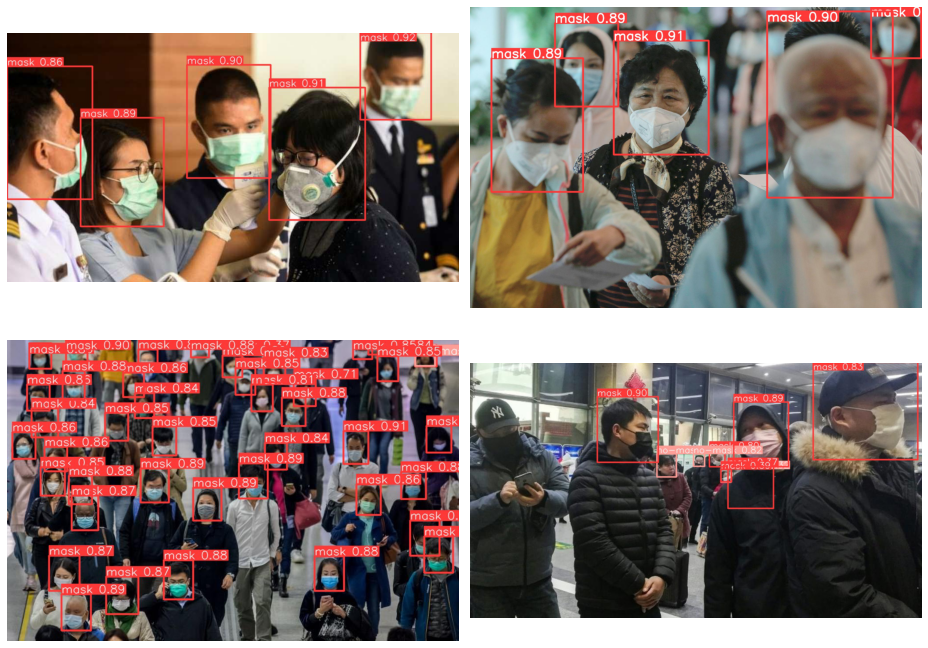

In [4]:
# visualize some inference results
bbox_img1 = plt.imread("runs/inference/exp_mask/126202-untitled-design-13_jpg.rf.baa3d2e55d469ae5d5d4cd81c4603e1d.jpg")
bbox_img2 = plt.imread("runs/inference/exp_mask/shutterstock_1627199179_jpg.rf.350e69105dd1458572a590c3e3ef2538.jpg")
bbox_img3 = plt.imread("runs/inference/exp_mask/phplpE73q_jpg.rf.0ab5de066db2a3791b039388014565fe.jpg")
bbox_img4 = plt.imread("runs/inference/exp_mask/the-first-day-of-wuhan-s-closure-some-people-fled-some-panicked_jpg.rf.51ed69bf8d327d93b429a08581f6dea0.jpg")

plt.figure(figsize=(13, 10))
plt.subplot(2, 2, 1)
plt.imshow(bbox_img1)
plt.axis("off") 

plt.subplot(2, 2, 2)
plt.imshow(bbox_img2)
plt.axis("off")

plt.subplot(2, 2, 3)
plt.imshow(bbox_img3)
plt.axis("off") 

plt.subplot(2, 2, 4)
plt.imshow(bbox_img4)
plt.axis("off")

plt.tight_layout()
plt.show()